# MNIST Handwritten Digit Recognition using Neural Network with Keras
 

  
<img src="https://cdn-images-1.medium.com/max/1600/0*At0wJRULTXvyA3EK.png" height='300' width='400' />

In [1]:
# imports for array-handling and plotting
%matplotlib inline

import numpy as np
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

# fix random seed for reproducibility
np.random.seed(5)

For this example we will use the MNIST hand written digist dataset. 

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist

## loads the dataset and divide into train and test
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [5]:
## How many classes and their counts
yn = np.unique(y_train, return_counts=True)
yn

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

<BarContainer object of 10 artists>

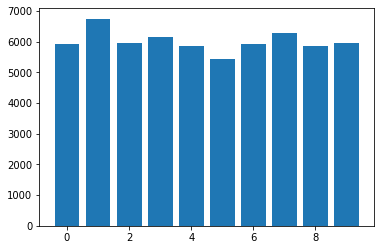

In [6]:
## plot the frequency of y's
plt.bar(yn[0],yn[1])


We now check the first nine data rows (pictures) and check their labels:

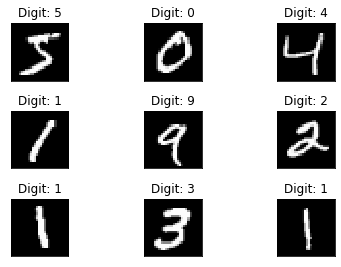

In [7]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [8]:
## reshape the dataset

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
X_train[0].tolist()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 18.0,
 18.0,
 18.0,
 126.0,
 136.0,
 175.0,
 26.0,
 166.0,
 255.0,
 247.0,
 127.0

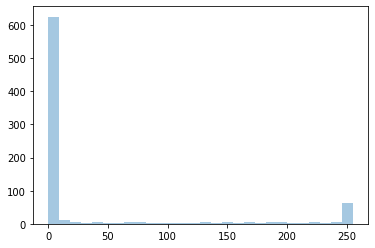

In [10]:
sns.distplot(X_train[0],kde=False)


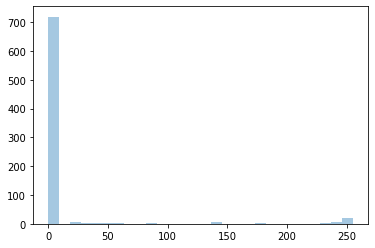

In [11]:
sns.distplot(X_train[8],kde=False)

In [12]:
# min-max scaling the data to help with the training
X_train /= 255
X_test /= 255

In [13]:
# print the final input shape ready for training
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


Before procedding with the NN, we have to make a final transformation to the data: we have to change the format of the labels (y). For this we have to create an array of 10 positions for each y. Each position will indicate with a one if the y is the relevant category or zero if not:

<code>
y     ---->    Transformation
              0 1 2 3 4 5 6 7 8 9
0            [1,0,0,0,0,0,0,0,0,0]
1            [0,1,0,0,0,0,0,0,0,0]
    ...
8            [0,0,0,0,0,0,0,0,1,0]
9            [0,0,0,0,0,0,0,0,0,1]
</code>

This type of transformation is called one-hot encoding.

In [14]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
#Y_train = np_utils.to_categorical(y_train, n_classes)
Y_train = np.eye(n_classes)[y_train]
#Y_test = np_utils.to_categorical(y_test, n_classes)
Y_test = np.eye(n_classes)[y_test]
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Defining the Neural Network Architecture
 
First we have to import in keras the "Sequential" fucntion. This is the most common NN type, that means we are going to define our NN one layer a time.
 
Then we initialize the NN by defining our model object and will add to it the layers as we defined in our network architecture plan.
 
The layers that we will use are fully conected layers, which means that we want that all the input data from the previous layer will be connedted with all the nodes of this layer. In keras we call this layer type "Dense".

When defining the layer we have to provide some parameters: input_dim is the dimmention of the input (in our case we have 10 inputs (variables) that enter our hidden layer. 
 
Another parameter is the activation function. We can define this function inside the layer definition, or separately (see alternatives 1 and 2).

In [15]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [16]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
#model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
#model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

## Training the model
 
To run our NN we have first to "compile" our model. The compilation require us to define some important parameters:
 
1. Define the <b>loss function</b>: this is the measure of the error. There are many types of loss functions that could be applied in NN's:
 - mean_squared_error
 - mean_absolute_error
 - mean_absolute_percentage_error
 - mean_squared_logarithmic_error
 - squared_hinge
 - hinge
 - categorical_hinge
 - logcosh
 - categorical_crossentropy
 - sparse_categorical_crossentropy
 - binary_crossentropy
 - kullback_leibler_divergence
 - poisson
 - cosine_proximity
 
 
2. Define the <b>optimizer</b>: this is the method we want to apply for the gradient descent. Some popular methods are:
 - Stochastic gradient descent (SGD)
 - Adaptive moment estimator (Adam)
 - batch gradient descent
 - mini-batch gradient descent 
 - Nesterov accelerated gradient (NAG)
 - Adagrad
 - AdaDelta
 - RMSprop

 
3. Define the <b>metrics</b>: Metric values are recorded at the end of each epoch on the training dataset. The most common metrics are:
 + For regression output:
    - Mean Squared Error (MSE)
    - Mean Absolute Error (MAE)
    - Mean Absolute Percentage Error (MAPE)
    - Cosine Proximity 
 
 + For classification output:
    - Binary Accuracy
    - Categorical Accuracy
    - Sparse Categorical Accuracy
    - Top k Categorical Accuracy
    - Sparse Top k Categorical Accuracy



In [17]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

After compilation, the model could be trained. We use the fit function to begin the training. 

In [19]:
# Fit the model
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 3s - loss: 0.2187 - accuracy: 0.9345 - val_loss: 0.1035 - val_accuracy: 0.9674
Epoch 2/20
469/469 - 3s - loss: 0.0782 - accuracy: 0.9762 - val_loss: 0.0821 - val_accuracy: 0.9738
Epoch 3/20
469/469 - 3s - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0721 - val_accuracy: 0.9785
Epoch 4/20
469/469 - 3s - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 5/20
469/469 - 3s - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0737 - val_accuracy: 0.9790
Epoch 6/20
469/469 - 3s - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.0674 - val_accuracy: 0.9797
Epoch 7/20
469/469 - 3s - loss: 0.0192 - accuracy: 0.9936 - val_loss: 0.0805 - val_accuracy: 0.9800
Epoch 8/20
469/469 - 3s - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.0706 - val_accuracy: 0.9801
Epoch 9/20
469/469 - 3s - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.0843 - val_accuracy: 0.9796
Epoch 10/20
469/469 - 3s - loss: 0.0139 - accuracy: 0.9954 - val_loss: 0.0753 - val_accuracy: 0.9835

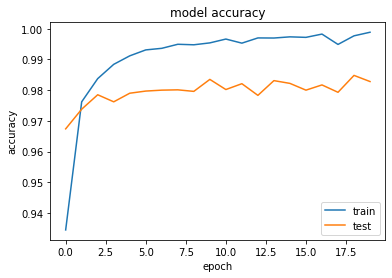

In [20]:
# plotting the metrics: Accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

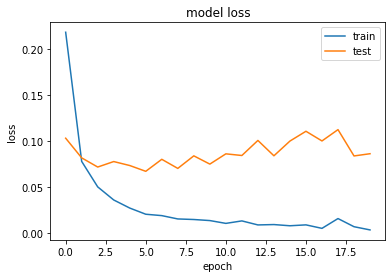

In [21]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


## Predicting using the model

We can then use the predict function to run the trained model on a new (test) dataset:

In [22]:
# calculate predictions
#predict_classes = model.predict_classes(X_test)
predict_classes = (model.predict(X_test) > 0.5).astype("int32")
predict_classes[0:30]

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0,

In [23]:
def getNumber(row):
    if sum(row)==1:
        return row.tolist().index(1)
    else:
        return np.nan

In [24]:
nums = map(getNumber,Y_test) 
y = list(nums)
y[0:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [25]:
nums = map(getNumber,predict_classes) 
yhat = list(nums)
yhat[0:20]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4]

In [26]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(np.array(yhat) == np.array(y))[0]
incorrect_indices = np.nonzero(np.array(yhat) != np.array(y))[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")
print("Accuracy: {}".format(len(correct_indices)/(len(correct_indices)+len(incorrect_indices))))


9824  classified correctly
176  classified incorrectly
Accuracy: 0.9824


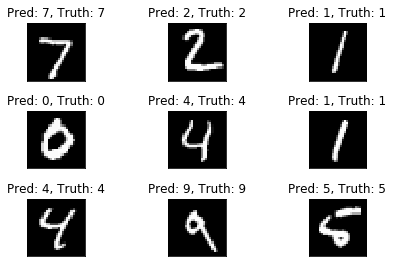

In [27]:
# plot 9 correct predictions
#fig = plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred: {}, Truth: {}".format(yhat[correct],
                                        y[correct]))
    plt.xticks([])
    plt.yticks([])


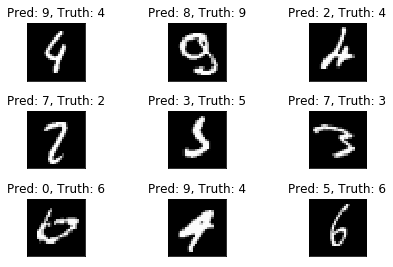

In [28]:
# plot 9 correct predictions
#fig = plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred: {}, Truth: {}".format(yhat[incorrect],
                                        y[incorrect]))
    plt.xticks([])
    plt.yticks([])


In [29]:
np.bincount(incorrect_indices)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [31]:
# yhat
d = {x:yhat.count(x) for x in yhat}
d

{7: 1044,
 2: 1026,
 1: 1136,
 0: 990,
 4: 971,
 9: 1001,
 5: 880,
 6: 955,
 3: 1006,
 8: 978,
 nan: 13}

([<matplotlib.axis.XTick at 0x1a2c3a28b88>,
 <a list of 11 Text xticklabel objects>)

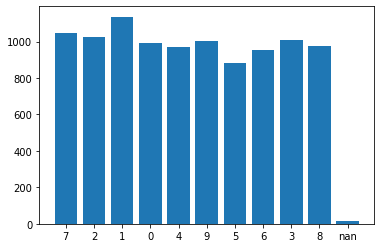

In [32]:
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))

### Using MSE, SGD and Categorical Accuracy metric

In [33]:
model.compile(loss='mean_squared_error', metrics=['categorical_accuracy'], optimizer='sgd')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [35]:
# Fit the model
res = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 3s - loss: 1.4873e-04 - categorical_accuracy: 0.9991 - val_loss: 0.0028 - val_categorical_accuracy: 0.9829
Epoch 2/20
469/469 - 3s - loss: 1.4457e-04 - categorical_accuracy: 0.9991 - val_loss: 0.0028 - val_categorical_accuracy: 0.9831
Epoch 3/20
469/469 - 3s - loss: 1.4068e-04 - categorical_accuracy: 0.9992 - val_loss: 0.0028 - val_categorical_accuracy: 0.9831
Epoch 4/20
469/469 - 3s - loss: 1.3704e-04 - categorical_accuracy: 0.9992 - val_loss: 0.0028 - val_categorical_accuracy: 0.9830
Epoch 5/20
469/469 - 3s - loss: 1.3362e-04 - categorical_accuracy: 0.9992 - val_loss: 0.0028 - val_categorical_accuracy: 0.9830
Epoch 6/20
469/469 - 3s - loss: 1.3037e-04 - categorical_accuracy: 0.9992 - val_loss: 0.0028 - val_categorical_accuracy: 0.9829
Epoch 7/20
469/469 - 3s - loss: 1.2731e-04 - categorical_accuracy: 0.9993 - val_loss: 0.0028 - val_categorical_accuracy: 0.9830
Epoch 8/20
469/469 - 3s - loss: 1.2439e-04 - categorical_accuracy: 0.9993 - val_loss: 0.0028 - val_categ

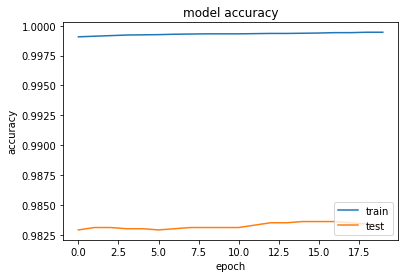

In [36]:
# plotting the metrics: Accuracy
plt.plot(res.history['categorical_accuracy'])
plt.plot(res.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

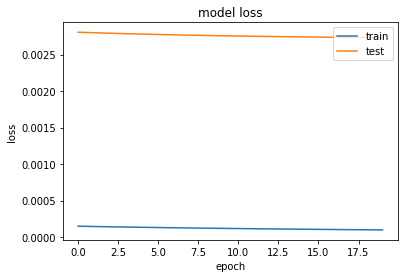

In [37]:
# plotting the metrics: loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')


In [38]:
# calculate predictions
predict_classes = model.predict_classes(X_test)
#predict_classes = (model.predict(X_test) > 0.5).astype("int32")
predict_classes[0:30]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1], dtype=int64)

In [39]:
# see which we predicted correctly and which not
correct_indices = np.nonzero(np.array(predict_classes) == np.array(y))[0]
incorrect_indices = np.nonzero(np.array(predict_classes) != np.array(y))[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")
print("Accuracy: {}".format(len(correct_indices)/(len(correct_indices)+len(incorrect_indices))))


9833  classified correctly
167  classified incorrectly
Accuracy: 0.9833
